In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

def outlier_analysis(df, cols=None, multiplier=1.5):
    """
    Perform outlier analysis on specified columns of the DataFrame using the IQR method.

    Parameters:
    - df: pandas DataFrame containing the data.
    - cols: list of column names to analyze. If None, analyzes all numeric columns except 'Potability'.
    - multiplier: float, factor to multiply the IQR (default is 1.5).

    Returns:
    - summary: A dictionary containing the IQR, bounds, and outlier counts for each analyzed column.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'Potability' in cols:
        cols.remove('Potability')

    summary = {}

    for col in cols:
        data = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = data[(data < lower_bound) | (data > upper_bound)]
        num_outliers = outliers.shape[0]
        percent_outliers = (num_outliers / data.shape[0]) * 100

        summary[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Num Outliers': num_outliers,
            'Percent Outliers': percent_outliers
        }

        print(f"{col}: Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}, "
              f"Outliers = {num_outliers} ({percent_outliers:.2f}%)")

    return summary

# Load the dataset
df = pd.read_csv("/content/water_potability.csv")

# Perform outlier analysis
summary = outlier_analysis(df)

# Visualize outliers using separate Plotly box plots
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Potability' in numeric_cols:
    numeric_cols.remove('Potability')

for col in numeric_cols:
    fig = go.Figure()
    fig.add_trace(go.Box(y=df[col], name=col, boxmean=True))
    fig.update_layout(title=f"Outlier Analysis - {col}", yaxis_title="Value", xaxis_title=col)
    fig.show()


ph: Lower Bound = 3.14, Upper Bound = 11.02, Outliers = 46 (1.65%)
Hardness: Lower Bound = 117.13, Upper Bound = 276.39, Outliers = 83 (2.53%)
Solids: Lower Bound = -1832.42, Upper Bound = 44831.87, Outliers = 47 (1.43%)
Chloramines: Lower Bound = 3.15, Upper Bound = 11.10, Outliers = 61 (1.86%)
Sulfate: Lower Bound = 229.32, Upper Bound = 438.33, Outliers = 41 (1.64%)
Conductivity: Lower Bound = 191.65, Upper Bound = 655.88, Outliers = 11 (0.34%)
Organic_carbon: Lower Bound = 5.33, Upper Bound = 23.30, Outliers = 25 (0.76%)
Trihalomethanes: Lower Bound = 23.61, Upper Bound = 109.58, Outliers = 33 (1.06%)
Turbidity: Lower Bound = 1.85, Upper Bound = 6.09, Outliers = 19 (0.58%)


In [ ]:
summary, fig = outlier_analysis(df)
print(summary)
fig.show()

[{'Column': 'ph', 'Q1': 6.09309191422186, 'Q3': 8.06206612314847, 'IQR': 1.9689742089266105, 'Lower Bound': 3.1396306008319446, 'Upper Bound': 11.015527436538386, 'Num Outliers': 46, 'Percent Outliers': 1.6517055655296229}, {'Column': 'Hardness', 'Q1': 176.85053787752437, 'Q3': 216.66745621487073, 'IQR': 39.81691833734635, 'Lower Bound': 117.12516037150485, 'Upper Bound': 276.3928337208903, 'Num Outliers': 83, 'Percent Outliers': 2.5335775335775335}, {'Column': 'Solids', 'Q1': 15666.69029696465, 'Q3': 27332.762127438615, 'IQR': 11666.071830473964, 'Lower Bound': -1832.4174487462951, 'Upper Bound': 44831.86987314956, 'Num Outliers': 47, 'Percent Outliers': 1.4346764346764347}, {'Column': 'Chloramines', 'Q1': 6.1274207554913, 'Q3': 8.114887032109028, 'IQR': 1.9874662766177282, 'Lower Bound': 3.1462213405647073, 'Upper Bound': 11.09608644703562, 'Num Outliers': 61, 'Percent Outliers': 1.862026862026862}, {'Column': 'Sulfate', 'Q1': 307.69949783471964, 'Q3': 359.9501703847443, 'IQR': 52.25

ph: Lower Bound = 3.14, Upper Bound = 11.02, Outliers = 46 (1.65%)
Hardness: Lower Bound = 117.13, Upper Bound = 276.39, Outliers = 83 (2.53%)
Solids: Lower Bound = -1832.42, Upper Bound = 44831.87, Outliers = 47 (1.43%)
Chloramines: Lower Bound = 3.15, Upper Bound = 11.10, Outliers = 61 (1.86%)
Sulfate: Lower Bound = 229.32, Upper Bound = 438.33, Outliers = 41 (1.64%)
Conductivity: Lower Bound = 191.65, Upper Bound = 655.88, Outliers = 11 (0.34%)
Organic_carbon: Lower Bound = 5.33, Upper Bound = 23.30, Outliers = 25 (0.76%)
Trihalomethanes: Lower Bound = 23.61, Upper Bound = 109.58, Outliers = 33 (1.06%)
Turbidity: Lower Bound = 1.85, Upper Bound = 6.09, Outliers = 19 (0.58%)


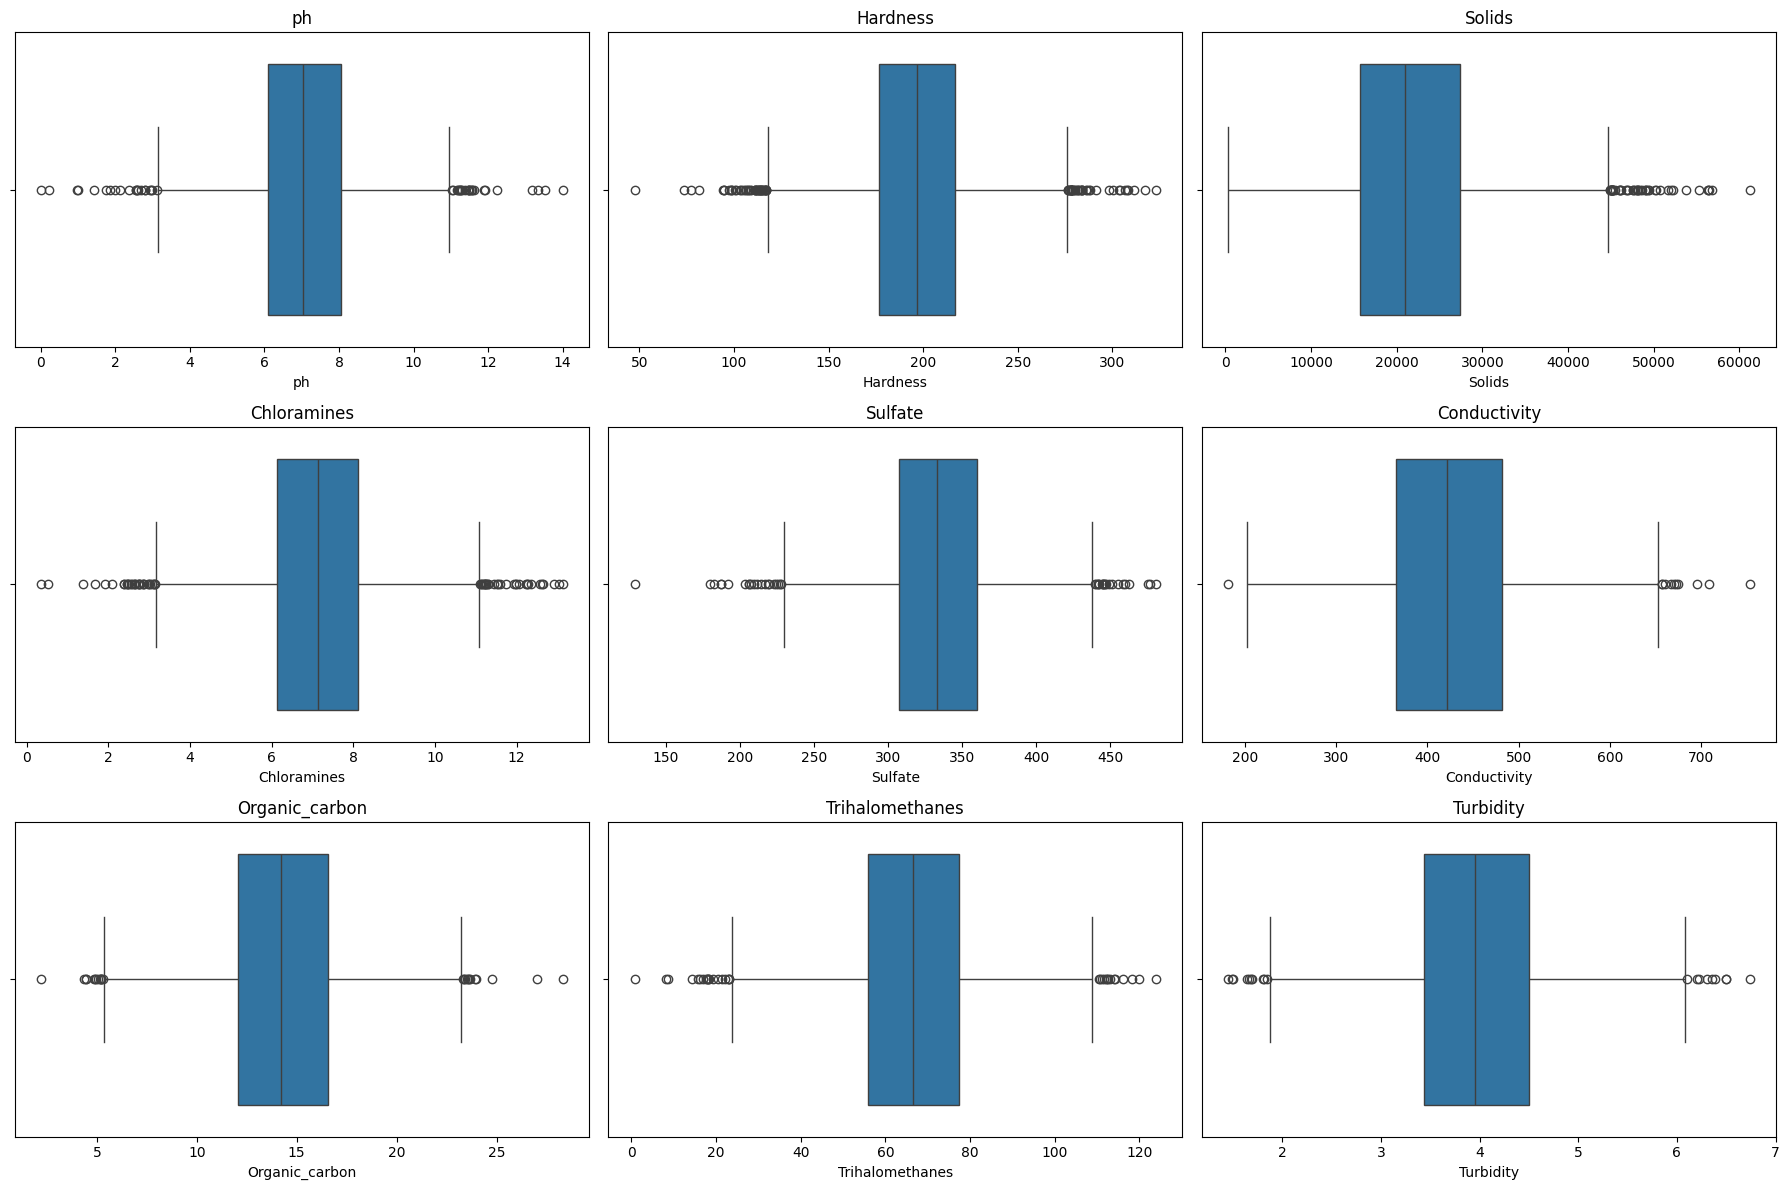

In [ ]:

# Load the dataset
df = pd.read_csv("/content/water_potability.csv")

# Perform outlier analysis
summary = outlier_analysis(df)

# Visualize outliers using box plots for each numerical feature (excluding 'Potability')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Potability' in numeric_cols:
    numeric_cols.remove('Potability')

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Imputation

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv("/content/water_potability.csv")

# Display initial missing value counts for each column
print("Missing values before imputation:")
print(df.isnull().sum())

# Select all numeric columns (including the ones with missing values)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create the median imputer
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the numeric data and transform the data
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Verify that there are no missing values left
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save the processed dataset to a new CSV file
df.to_csv("water_potability_processed.csv", index=False)

print("\nProcessed CSV saved as 'water_potability_processed.csv'.")


Missing values before imputation:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Processed CSV saved as 'water_potability_processed.csv'.


In [ ]:
import pandas as pd

# Load your water potability dataset
df = pd.read_csv('water_potability_processed.csv')

# Loop through each column and print its min and max values
for col in df.columns:
    # Check if the column is numeric to avoid issues with non-numeric types
    if pd.api.types.is_numeric_dtype(df[col]):
        min_val = df[col].min()
        max_val = df[col].max()
        print(f"{col}: min = {min_val}, max = {max_val}")
    else:
        print(f"{col}: non-numeric column")


ph: min = 0.0, max = 13.999999999999998
Hardness: min = 47.432, max = 323.124
Solids: min = 320.942611274359, max = 61227.19600771213
Chloramines: min = 0.3520000000000003, max = 13.127000000000002
Sulfate: min = 129.00000000000003, max = 481.0306423059972
Conductivity: min = 181.483753985146, max = 753.3426195583046
Organic_carbon: min = 2.1999999999999886, max = 28.30000000000001
Trihalomethanes: min = 0.7379999999999995, max = 124.0
Turbidity: min = 1.45, max = 6.739
Potability: min = 0.0, max = 1.0


In [ ]:
import numpy as np
import pandas as pd

def augment_with_noise(dataframe, noise_level=0.01, n_new=1000):
    """
    Augments the dataframe by generating additional rows.

    For each new row:
      - A row is sampled (with replacement) from the original dataframe.
      - Gaussian noise is added to each numeric feature (except 'potability').
      - The noisy value is clipped to a valid range defined for that metric.

    Parameters:
      dataframe (pd.DataFrame): The original dataset.
      noise_level (float): Fraction of the column's standard deviation used for noise.
      n_new (int): Number of additional rows to generate.

    Returns:
      pd.DataFrame: The augmented dataframe (original rows + new rows).
    """

    # Make a copy of the original data
    df_augmented = dataframe.copy()

    # Get the list of numeric columns except the target 'potability'
    numeric_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    if 'Potability' in numeric_cols:
        numeric_cols.remove('Potability')

    # Define valid ranges for each metric
    valid_ranges = {
        'ph': (0.0, 14.0),
        'Hardness': (0.0, 500.0),
        'Solids': (0.0, 100000.0),
        'Chloramines': (0.0, 15.0),
        'Sulfate': (0.0, 600.0),
        'Conductivity': (0.0, 1500.0),
        'Organic_carbon': (0.0, 30.0),
        'Trihalomethanes': (0.0, 150.0),
        'Turbidity': (0.0, 10.0)
    }

    # List to store the newly generated rows
    new_rows = []
    for _ in range(n_new):
        # Randomly sample a row from the original dataframe (with replacement)
        row = dataframe.sample(n=1, replace=True).copy()
        # For each numeric column, add noise and clip to the defined range
        for col in numeric_cols:
            # Calculate the noise using a normal distribution; scale by noise_level * column std
            col_std = dataframe[col].std()
            noise = np.random.normal(loc=0, scale=noise_level * col_std)
            new_val = row[col].iloc[0] + noise
            # If this column has a defined valid range, clip the value accordingly
            if col in valid_ranges:
                min_val, max_val = valid_ranges[col]
                new_val = np.clip(new_val, min_val, max_val)
            row[col] = new_val
        # Append the modified row (target 'potability' remains unchanged)
        new_rows.append(row)

    # Concatenate the new rows into a single DataFrame
    df_new = pd.concat(new_rows, ignore_index=True)
    # Append the new rows to the original data
    df_augmented = pd.concat([df_augmented, df_new], ignore_index=True)

    return df_augmented


df_augmented = augment_with_noise(df, noise_level=0.01, n_new=2000)

In [ ]:
df.shape

(3276, 10)

In [ ]:
df_augmented.shape

(5276, 10)

In [ ]:
# Make a copy of the original data
df_augmented_test = df.copy()

# Get the list of numeric columns except the target 'potability'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Potability' in numeric_cols:
        numeric_cols.remove('Potability')

In [ ]:
print(numeric_cols)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


In [ ]:
df_augmented.info()
df_augmented.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5276 entries, 0 to 5275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               5276 non-null   float64
 1   Hardness         5276 non-null   float64
 2   Solids           5276 non-null   float64
 3   Chloramines      5276 non-null   float64
 4   Sulfate          5276 non-null   float64
 5   Conductivity     5276 non-null   float64
 6   Organic_carbon   5276 non-null   float64
 7   Trihalomethanes  5276 non-null   float64
 8   Turbidity        5276 non-null   float64
 9   Potability       5276 non-null   float64
dtypes: float64(10)
memory usage: 412.3 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000
mean,7.080109,196.360977,22001.129222,7.117803,334.257773,425.716596,14.308537,66.464669,3.957733,0.399924
std,1.463794,32.434499,8730.493160,1.571891,36.462673,80.775577,3.291134,15.752219,0.783403,0.489929
min,0.000000,47.432000,320.942611,0.345997,128.789697,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.274945,177.198165,15647.839580,6.129838,317.492955,365.087718,12.128374,56.491454,3.422025,0.000000
50%,7.036752,196.778920,21022.126645,7.136606,333.073546,421.147524,14.247815,66.622485,3.947256,0.000000
75%,7.879040,216.555091,27201.427901,8.108452,351.220562,481.360249,16.564384,76.695862,4.494481,1.000000
max,14.000000,323.124000,61346.793989,13.143379,481.030642,753.691041,28.300000,124.000000,6.739000,1.000000


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Assume df_noisy is your dataframe with noise already added (or the original data if no noise addition is desired)
# Separate features and target
X = df_augmented.drop('Potability', axis=1)
y = df_augmented['Potability']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define valid ranges for each numeric metric (ensure column names match your DataFrame)
valid_ranges = {
    'ph': (0.0, 14.0),
    'Hardness': (0.0, 500.0),
    'Solids': (0.0, 100000.0),
    'Chloramines': (0.0, 15.0),
    'Sulfate': (0.0, 600.0),
    'Conductivity': (0.0, 1500.0),
    'Organic_carbon': (0.0, 30.0),
    'Trihalomethanes': (0.0, 150.0),
    'Turbidity': (0.0, 10.0)
}

# Clip oversampled values to their valid ranges
for col, (min_val, max_val) in valid_ranges.items():
    if col in X_resampled.columns:
        X_resampled[col] = np.clip(X_resampled[col], min_val, max_val)

# Combine the oversampled features and target back into a DataFrame
df_augmented = pd.concat([X_resampled, y_resampled], axis=1)

# Check the new distribution of the 'potability' variable
print(df_augmented['Potability'].value_counts())


Potability
0.0    3166
1.0    3166
Name: count, dtype: int64


In [ ]:
df_augmented.to_csv('water_potability_augmented.csv', index=False)

In [ ]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.0/155.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [ ]:
from sdv.metadata import Metadata

In [ ]:
metadata = Metadata.detect_from_dataframe(
    data=df_augmented,
    table_name='water_potability_augmented')

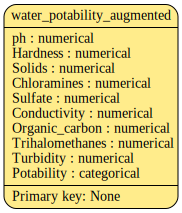

In [ ]:
metadata.visualize(
    show_table_details='full',
    show_relationship_labels=True,
    output_filepath='my_metadata.png'
)

In [ ]:
df_augmented.shape
df_augmented.info()
df_augmented['ph'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               6332 non-null   float64
 1   Hardness         6332 non-null   float64
 2   Solids           6332 non-null   float64
 3   Chloramines      6332 non-null   float64
 4   Sulfate          6332 non-null   float64
 5   Conductivity     6332 non-null   float64
 6   Organic_carbon   6332 non-null   float64
 7   Trihalomethanes  6332 non-null   float64
 8   Turbidity        6332 non-null   float64
 9   Potability       6332 non-null   float64
dtypes: float64(10)
memory usage: 494.8 KB


14.0

In [ ]:
metadata.update_column('ph', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 14.0})
metadata.update_column('Hardness', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 500.0})
metadata.update_column('Solids', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 100000.0})
metadata.update_column('Chloramines', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 15.0})
metadata.update_column('Sulfate', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 600.0})
metadata.update_column('Conductivity', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 1500.0})
metadata.update_column('Organic_carbon', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 30.0})
metadata.update_column('Trihalomethanes', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 150.0})
metadata.update_column('Turbidity', sdtype='numerical', properties={'minimum': 0.0, 'maximum': 10.0})


InvalidMetadataError: Invalid values '(properties)' for numerical column 'ph'.

In [ ]:
metadata.save_to_json(filepath='my_metadata_v1.json')

In [ ]:
metadata = Metadata.load_from_json(filepath='my_metadata_v1.json')

In [ ]:
print(metadata)

{
    "tables": {
        "water_potability_augmented": {
            "columns": {
                "ph": {
                    "sdtype": "numerical"
                },
                "Hardness": {
                    "sdtype": "numerical"
                },
                "Solids": {
                    "sdtype": "numerical"
                },
                "Chloramines": {
                    "sdtype": "numerical"
                },
                "Sulfate": {
                    "sdtype": "numerical"
                },
                "Conductivity": {
                    "sdtype": "numerical"
                },
                "Organic_carbon": {
                    "sdtype": "numerical"
                },
                "Trihalomethanes": {
                    "sdtype": "numerical"
                },
                "Turbidity": {
                    "sdtype": "numerical"
                },
                "Potability": {
                    "sdtype": "categorical"
          

In [ ]:
from sdv.single_table import CTGANSynthesizer

# Initialize the CTGAN synthesizer with your metadata
synthesizer = CTGANSynthesizer(
    metadata=metadata,       # Ensure your metadata is already set up with the proper table name and column types
    enforce_rounding=False,  # As required
    epochs=250,
    verbose=True,
    discriminator_steps=5   # Increased discriminator steps
)

In [ ]:
# Fit the synthesizer with your real data (assuming your DataFrame is called df)
synthesizer.fit(df_augmented)

#sample the data
synthetic_data = synthesizer.sample(
    num_rows=1_200_00,
    batch_size=2000
)

Gen. (-0.23) | Discrim. (-0.24): 100%|██████████| 250/250 [16:36<00:00,  3.98s/it]
Sampling rows: 100%|██████████| 120000/120000 [00:08<00:00, 14985.69it/s]


In [ ]:
# (Optional) Print a summary to check if values are within bounds
print(synthetic_data.describe())

                  ph       Hardness         Solids    Chloramines  \
count  120000.000000  120000.000000  120000.000000  120000.000000   
mean        7.274836     193.016903   21729.310891       7.424841   
std         1.305187      31.658957    8526.442832       1.547516   
min         0.000000      47.799586     320.942611       0.345997   
25%         6.598527     173.574108   15650.919209       6.445720   
50%         7.098240     194.854789   20500.261062       7.362098   
75%         8.019969     213.505706   26631.043934       8.354253   
max        14.000000     311.997905   61346.793989      13.143379   

             Sulfate   Conductivity  Organic_carbon  Trihalomethanes  \
count  120000.000000  120000.000000   120000.000000    120000.000000   
mean      340.573155     405.262352       14.294148        68.922471   
std        34.803045      75.057097        3.196138        14.555959   
min       141.946571     181.483754        2.762614         2.873276   
25%       321.6777

In [ ]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality

#setting real data
real_data=df

# 1. perform basic validity checks
diagnostic = run_diagnostic(real_data, synthetic_data, metadata)

# 2. measure the statistical similarity
quality_report = evaluate_quality(real_data, synthetic_data, metadata)



Generating report ...

(1/2) Evaluating Data Validity: |██████████| 10/10 [00:00<00:00, 391.78it/s]|
Data Validity Score: 99.99%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 203.32it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.99%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 36.57it/s]|
Column Shapes Score: 91.37%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:01<00:00, 33.36it/s]|
Column Pair Trends Score: 96.36%

Overall Score (Average): 93.86%



In [ ]:
from sdv.evaluation.single_table import get_column_plot
from IPython.display import display

# List of column names to plot
columns_to_plot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                   'Conductivity', 'Organic_carbon', 'Trihalomethanes',
                   'Turbidity', 'Potability']

# Loop through columns and generate plots
for column_name in columns_to_plot:
    fig = get_column_plot(
        real_data=real_data,
        synthetic_data=synthetic_data,
        metadata=metadata,
        column_name=column_name
    )
    display(fig) # Use display to show the plot in the output

In [ ]:
# Save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_water_potability.csv', index=False)
print("Synthetic data saved to 'synthetic_water_potability.csv'")

Synthetic data saved to 'synthetic_water_potability.csv'


In [ ]:
from sdmetrics.reports.single_table import DiagnosticReport

# Convert metadata to dictionary
metadata_dict = metadata.to_dict()

# Add 'columns' information if missing
if 'columns' not in metadata_dict:
    metadata_dict['columns'] = {}
    for column in df.columns:
        metadata_dict['columns'][column] = {
            'sdtype': str(df[column].dtype),  # You might need to adjust sdtype based on your data
            # Add other relevant column information if needed (e.g., 'pii', 'nullable')
        }

# Generate the report using the updated metadata
report = DiagnosticReport()
report.generate(real_data, synthetic_data, metadata_dict)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 10/10 [00:00<00:00, 2458.42it/s]|
Data Validity Score: nan%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 202.20it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



ph: Lower Bound = 4.47, Upper Bound = 10.15, Outliers = 5134 (4.28%)
Hardness: Lower Bound = 113.68, Upper Bound = 273.40, Outliers = 2095 (1.75%)
Solids: Lower Bound = -819.27, Upper Bound = 43101.23, Outliers = 2296 (1.91%)
Chloramines: Lower Bound = 3.58, Upper Bound = 11.22, Outliers = 2251 (1.88%)
Sulfate: Lower Bound = 263.79, Upper Bound = 418.17, Outliers = 4535 (3.78%)
Conductivity: Lower Bound = 194.92, Upper Bound = 610.38, Outliers = 602 (0.50%)
Organic_carbon: Lower Bound = 5.55, Upper Bound = 23.02, Outliers = 713 (0.59%)
Trihalomethanes: Lower Bound = 31.57, Upper Bound = 105.89, Outliers = 1933 (1.61%)
Turbidity: Lower Bound = 1.99, Upper Bound = 6.10, Outliers = 582 (0.48%)


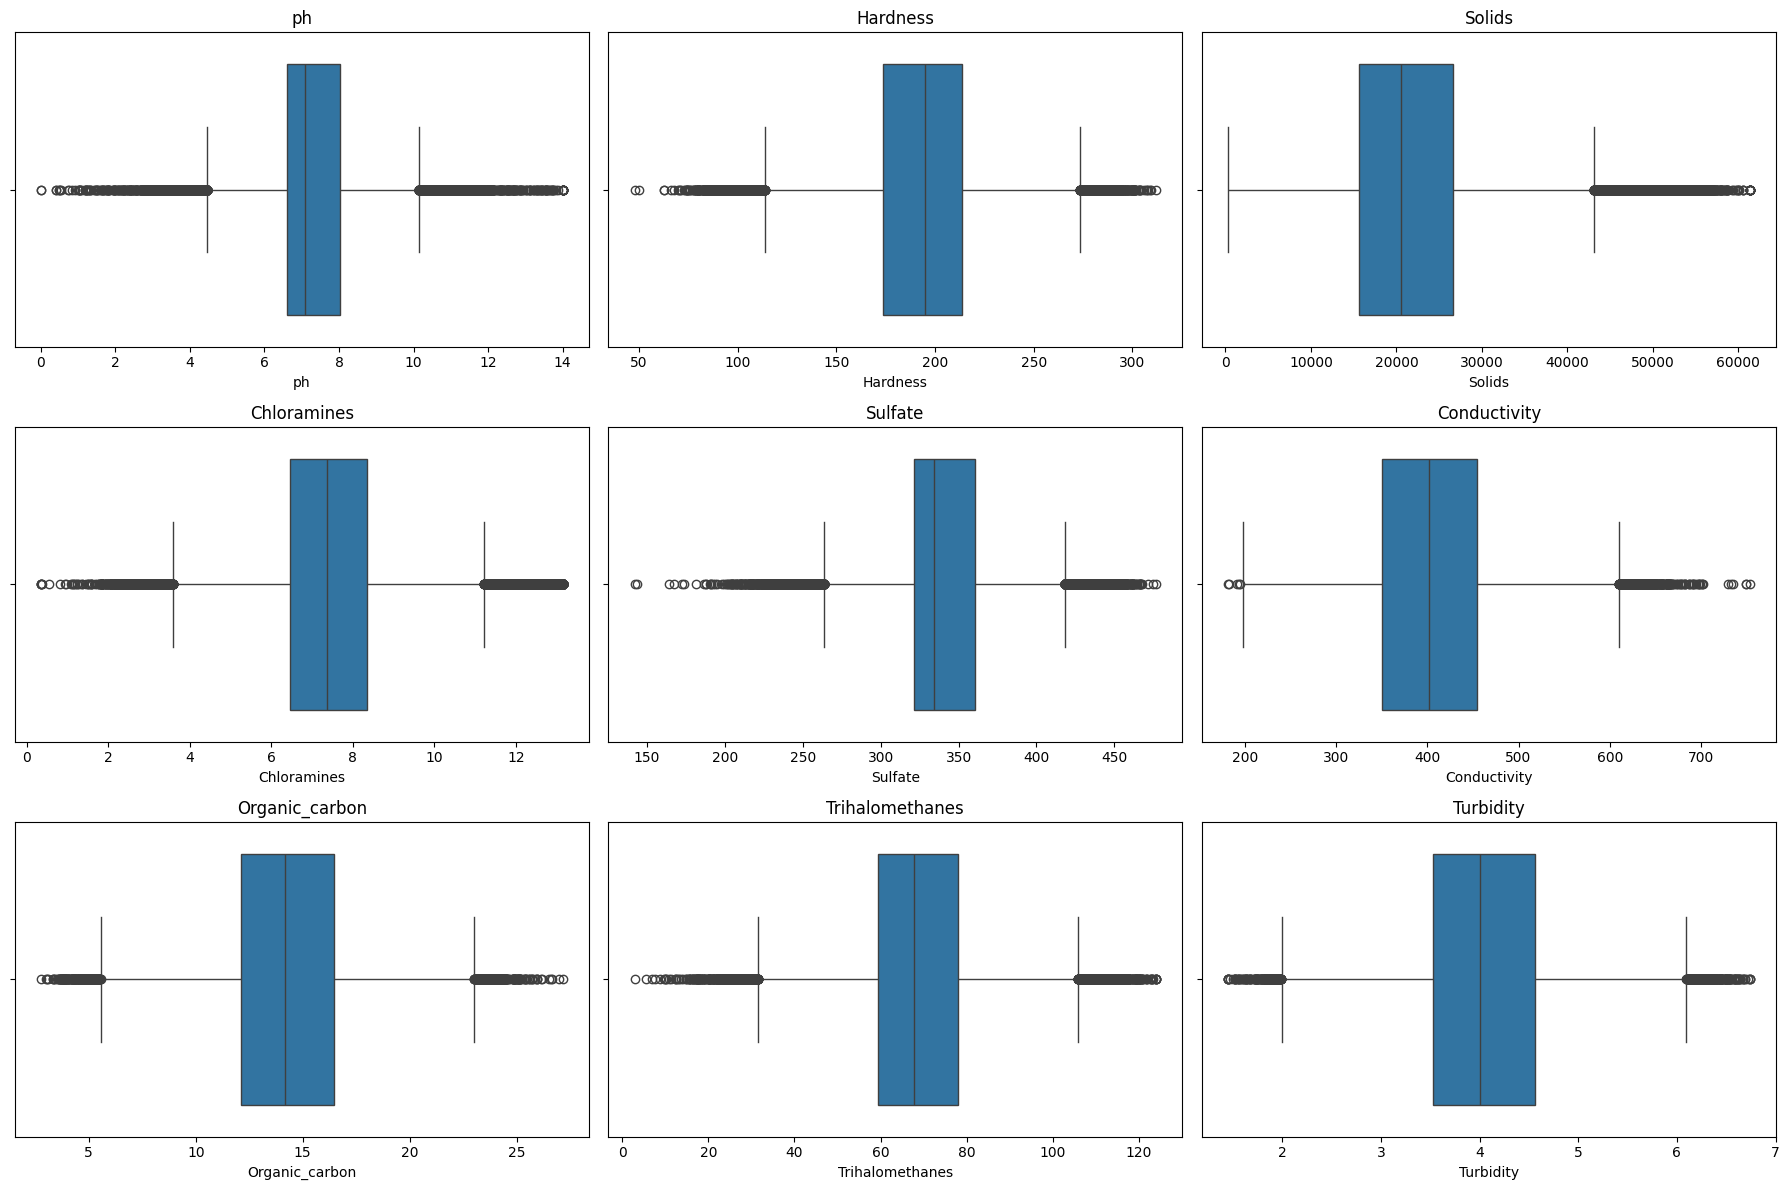

In [ ]:
# Load the dataset
df = pd.read_csv("/content/synthetic_water_potability.csv")

# Perform outlier analysis
summary = outlier_analysis(df)

# Visualize outliers using box plots for each numerical feature (excluding 'Potability')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Potability' in numeric_cols:
    numeric_cols.remove('Potability')

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
